In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

pd.set_option('display.max_columns', 120)
pd.set_option('display.max_rows', 120)

# Load in csv from Data Cleaning

In [2]:
wrangled_data = pd.read_csv('wrangled_data.csv')
wrangled_data.shape

(99984, 90)

In [3]:
wrangled_data.head()

,Unnamed: 0,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_util,total_acc,initial_list_status,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,debt_settlement_flag,last_fico_range
0,1592860,15000.0,36 months,6.71,461.18,A,A3,Truck driver,10+ years,RENT,28000.0,Source Verified,Apr-2018,Fully Paid,car,941xx,CA,10.66,0.0,Feb-1996,804.0,0.0,0.0,0.0,19.0,0.0,6.2,33.0,f,Jan-2019,0.0,0.0,Individual,0.0,0.0,7168.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0,6477.0,6.0,114700.0,0.0,0.0,1.0,5.0,377.0,95032.0,7.0,0.0,0.0,0.0,266.0,3.0,3.0,0.0,3.0,0.0,7.0,0.0,0.0,5.0,5.0,15.0,24.0,0.0,19.0,33.0,5.0,19.0,0.0,0.0,0.0,3.0,100.0,0.0,0.0,0.0,114700.0,7168.0,102200.0,0.0,N,4.0
1,1019497,3000.0,36 months,11.99,99.63,C,C1,cook,2 years,RENT,40000.0,Not Verified,Mar-2016,Fully Paid,debt_consolidation,600xx,IL,13.86,0.0,Oct-2003,664.0,2.0,0.0,55.0,8.0,4.0,26.9,14.0,w,Mar-2019,1.0,0.0,Individual,0.0,64.0,16375.0,1.0,1.0,0.0,1.0,16.0,14383.0,87.0,1.0,6.0,636.0,68.0,7400.0,3.0,0.0,5.0,7.0,2339.0,4137.0,27.4,0.0,0.0,124.0,149.0,3.0,3.0,1.0,21.0,0.0,2.0,0.0,0.0,3.0,5.0,3.0,6.0,2.0,7.0,11.0,5.0,8.0,0.0,0.0,0.0,1.0,100.0,0.0,2.0,2.0,24025.0,16375.0,5700.0,16625.0,N,4.0
2,2072955,12000.0,60 months,19.03,311.49,D,D3,Underwriting Director,10+ years,MORTGAGE,136000.0,Source Verified,Dec-2017,Fully Paid,home_improvement,970xx,OR,18.52,0.0,Sep-2003,704.0,0.0,42.0,0.0,9.0,0.0,61.7,18.0,w,Mar-2019,0.0,0.0,Individual,0.0,0.0,305905.0,1.0,2.0,2.0,2.0,5.0,53293.0,24.0,0.0,0.0,25017.0,49.0,44500.0,1.0,1.0,1.0,3.0,33989.0,13062.0,67.6,0.0,0.0,59.0,170.0,44.0,5.0,5.0,44.0,0.0,8.0,42.0,0.0,4.0,5.0,4.0,4.0,6.0,6.0,7.0,5.0,9.0,0.0,0.0,0.0,3.0,94.4,25.0,0.0,0.0,344622.0,80748.0,40300.0,71795.0,N,4.0
3,1278099,9600.0,36 months,13.98,328.02,C,C3,Service Manager,< 1 year,MORTGAGE,48000.0,Verified,May-2014,Fully Paid,debt_consolidation,495xx,MI,22.15,1.0,Oct-2001,704.0,5.0,12.0,0.0,9.0,0.0,34.2,40.0,w,Mar-2019,0.0,0.0,Individual,0.0,866.0,89692.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12200.0,0.0,0.0,0.0,7.0,9966.0,5101.0,17.0,0.0,0.0,95.0,150.0,1.0,1.0,2.0,1.0,0.0,1.0,12.0,0.0,3.0,6.0,4.0,19.0,2.0,7.0,36.0,6.0,9.0,0.0,0.0,0.0,3.0,97.4,0.0,0.0,0.0,120528.0,7377.0,6600.0,22068.0,N,4.0
4,1870253,30000.0,36 months,16.29,1059.02,C,C4,ABM,10+ years,RENT,142850.0,Verified,Mar-2013,Fully Paid,debt_consolidation,949xx,CA,8.30,1.0,Sep-1983,664.0,0.0,9.0,0.0,7.0,0.0,87.3,21.0,f,May-2015,0.0,32.0,Individual,0.0,0.0,33047.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12200.0,0.0,0.0,0.0,2.0,4721.0,365.0,96.2,0.0,0.0,150.0,358.0,12.0,9.0,3.0,12.0,24.0,0.0,9.0,1.0,3.0,5.0,3.0,6.0,6.0,5.0,10.0,5.0,7.0,0.0,0.0,0.0,2.0,71.0,66.7,0.0,0.0,43580.0,33047.0,9700.0,31380.0,N,4.0


In [4]:
wrangled_data.set_index('Unnamed: 0', inplace=True)

wrangled_data.index.names = ['Loan ID']
wrangled_data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_util,total_acc,initial_list_status,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,debt_settlement_flag,last_fico_range
Loan ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1592860,15000.0,36 months,6.71,461.18,A,A3,Truck driver,10+ years,RENT,28000.0,Source Verified,Apr-2018,Fully Paid,car,941xx,CA,10.66,0.0,Feb-1996,804.0,0.0,0.0,0.0,19.0,0.0,6.2,33.0,f,Jan-2019,0.0,0.0,Individual,0.0,0.0,7168.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0,6477.0,6.0,114700.0,0.0,0.0,1.0,5.0,377.0,95032.0,7.0,0.0,0.0,0.0,266.0,3.0,3.0,0.0,3.0,0.0,7.0,0.0,0.0,5.0,5.0,15.0,24.0,0.0,19.0,33.0,5.0,19.0,0.0,0.0,0.0,3.0,100.0,0.0,0.0,0.0,114700.0,7168.0,102200.0,0.0,N,4.0
1019497,3000.0,36 months,11.99,99.63,C,C1,cook,2 years,RENT,40000.0,Not Verified,Mar-2016,Fully Paid,debt_consolidation,600xx,IL,13.86,0.0,Oct-2003,664.0,2.0,0.0,55.0,8.0,4.0,26.9,14.0,w,Mar-2019,1.0,0.0,Individual,0.0,64.0,16375.0,1.0,1.0,0.0,1.0,16.0,14383.0,87.0,1.0,6.0,636.0,68.0,7400.0,3.0,0.0,5.0,7.0,2339.0,4137.0,27.4,0.0,0.0,124.0,149.0,3.0,3.0,1.0,21.0,0.0,2.0,0.0,0.0,3.0,5.0,3.0,6.0,2.0,7.0,11.0,5.0,8.0,0.0,0.0,0.0,1.0,100.0,0.0,2.0,2.0,24025.0,16375.0,5700.0,16625.0,N,4.0
2072955,12000.0,60 months,19.03,311.49,D,D3,Underwriting Director,10+ years,MORTGAGE,136000.0,Source Verified,Dec-2017,Fully Paid,home_improvement,970xx,OR,18.52,0.0,Sep-2003,704.0,0.0,42.0,0.0,9.0,0.0,61.7,18.0,w,Mar-2019,0.0,0.0,Individual,0.0,0.0,305905.0,1.0,2.0,2.0,2.0,5.0,53293.0,24.0,0.0,0.0,25017.0,49.0,44500.0,1.0,1.0,1.0,3.0,33989.0,13062.0,67.6,0.0,0.0,59.0,170.0,44.0,5.0,5.0,44.0,0.0,8.0,42.0,0.0,4.0,5.0,4.0,4.0,6.0,6.0,7.0,5.0,9.0,0.0,0.0,0.0,3.0,94.4,25.0,0.0,0.0,344622.0,80748.0,40300.0,71795.0,N,4.0
1278099,9600.0,36 months,13.98,328.02,C,C3,Service Manager,< 1 year,MORTGAGE,48000.0,Verified,May-2014,Fully Paid,debt_consolidation,495xx,MI,22.15,1.0,Oct-2001,704.0,5.0,12.0,0.0,9.0,0.0,34.2,40.0,w,Mar-2019,0.0,0.0,Individual,0.0,866.0,89692.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12200.0,0.0,0.0,0.0,7.0,9966.0,5101.0,17.0,0.0,0.0,95.0,150.0,1.0,1.0,2.0,1.0,0.0,1.0,12.0,0.0,3.0,6.0,4.0,19.0,2.0,7.0,36.0,6.0,9.0,0.0,0.0,0.0,3.0,97.4,0.0,0.0,0.0,120528.0,7377.0,6600.0,22068.0,N,4.0
1870253,30000.0,36 months,16.29,1059.02,C,C4,ABM,10+ years,RENT,142850.0,Verified,Mar-2013,Fully Paid,debt_consolidation,949xx,CA,8.30,1.0,Sep-1983,664.0,0.0,9.0,0.0,7.0,0.0,87.3,21.0,f,May-2015,0.0,32.0,Individual,0.0,0.0,33047.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12200.0,0.0,0.0,0.0,2.0,4721.0,365.0,96.2,0.0,0.0,150.0,358.0,12.0,9.0,3.0,12.0,24.0,0.0,9.0,1.0,3.0,5.0,3.0,6.0,6.0,5.0,10.0,5.0,7.0,0.0,0.0,0.0,2.0,71.0,66.7,0.0,0.0,43580.0,33047.0,9700.0,31380.0,N,4.0


# Review predictor column --> 'loan_status'

In [5]:
wrangled_data['loan_status'].value_counts()

Charged Off    49995
Fully Paid     49989
Name: loan_status, dtype: int64

In [6]:
# the dataframe has equal rows for each predictor. Perfect.

# Look at corr() for each

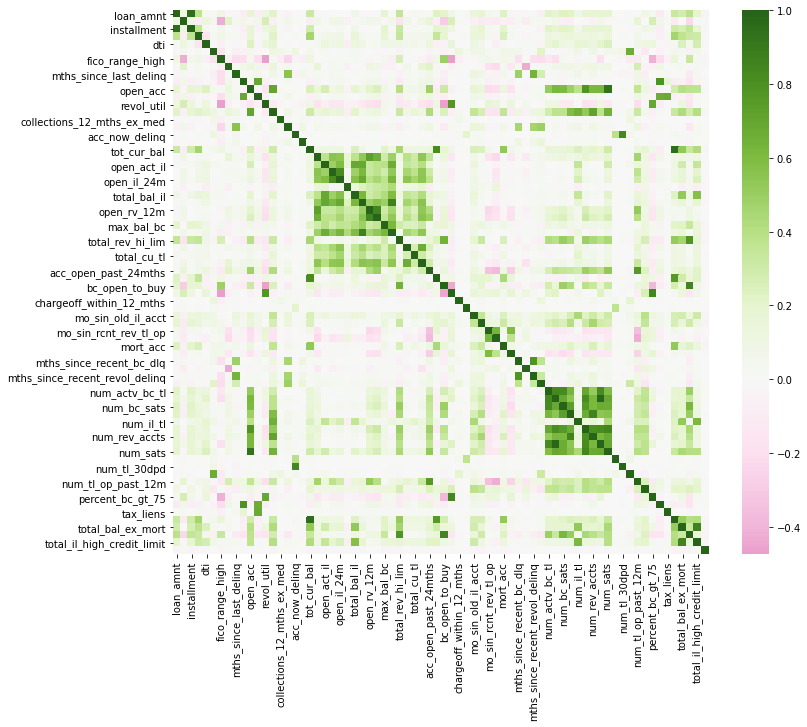

In [7]:
plt.subplots(figsize=(12,10))
sns.heatmap(wrangled_data[wrangled_data['loan_status'] == 'Fully Paid'].corr(), center=0, cmap="PiYG")

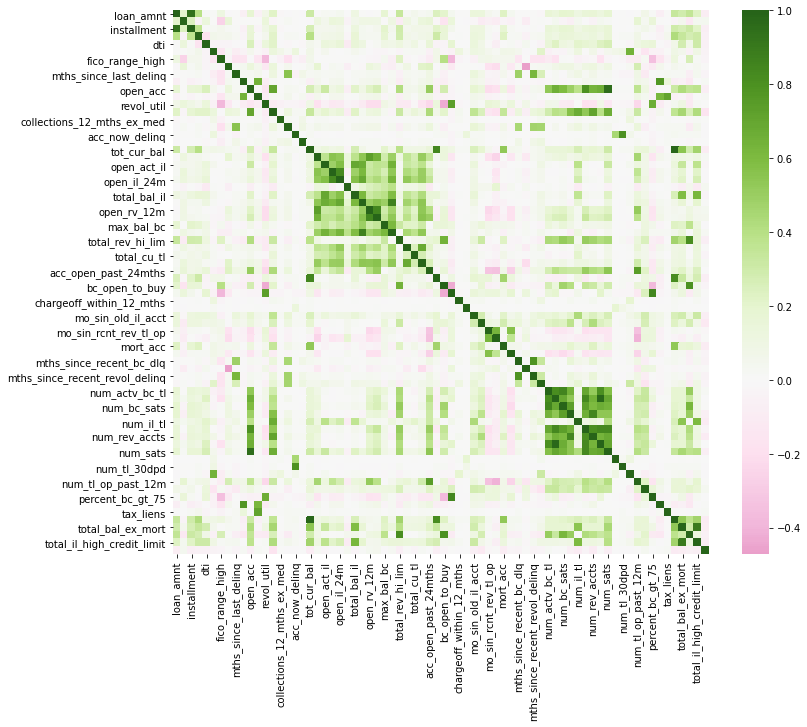

In [8]:
plt.subplots(figsize=(12,10))
sns.heatmap(wrangled_data[wrangled_data['loan_status'] == 'Charged Off'].corr(), center=0, cmap="PiYG")

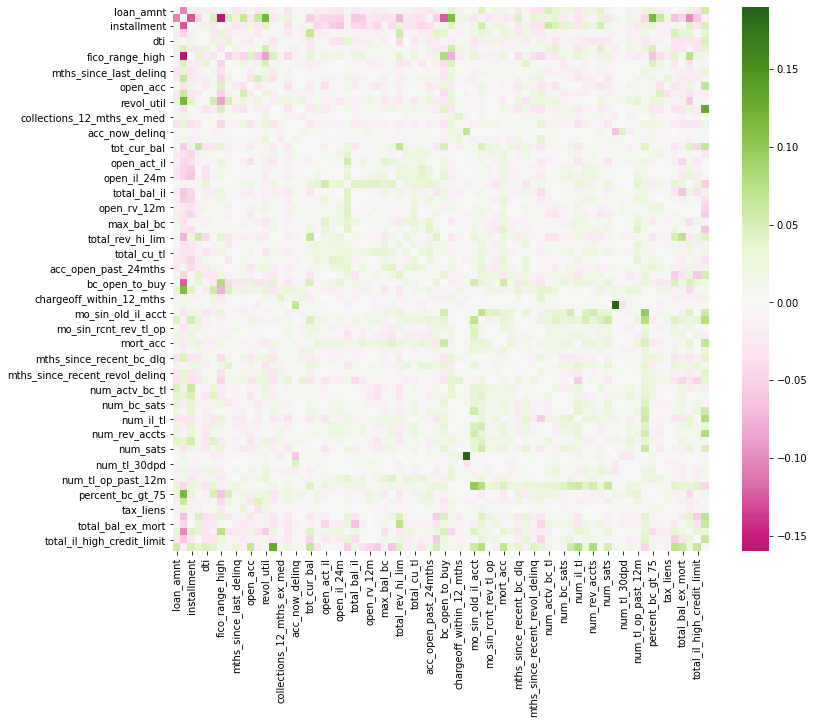

In [9]:
# difference in corr() values from fully paid to charged off

difference = wrangled_data[wrangled_data['loan_status'] == 'Fully Paid'].corr() - wrangled_data[wrangled_data['loan_status'] == 'Charged Off'].corr()

plt.subplots(figsize=(12,10))
sns.heatmap(difference, center=0, cmap="PiYG")

# positive means Fully Paid is more correlated
# negative means Charged Off is more correlated

In [10]:
# difficult to see trends with this many features...

# make violin plots for each numeric feature side-by-side (Fully Paid - Charged Off)

In [11]:
numeric_cols = list(wrangled_data.select_dtypes('float').columns)
numeric_cols


['loan_amnt',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_util',
 'total_acc',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sat

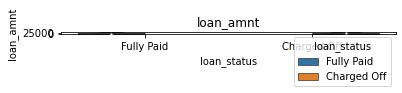

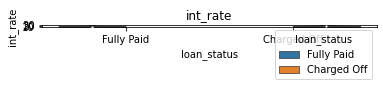

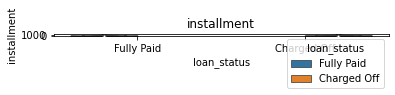

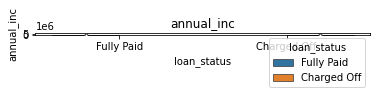

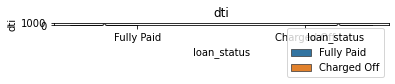

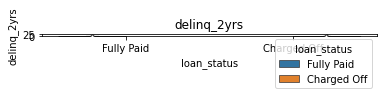

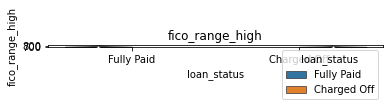

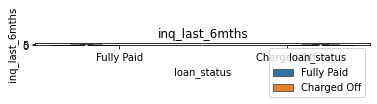

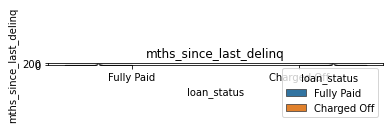

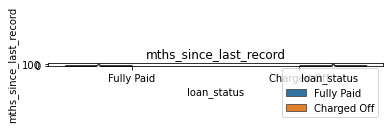

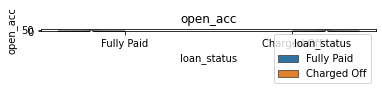

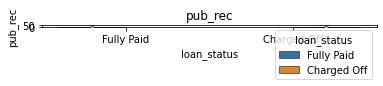

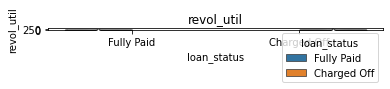

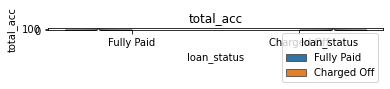

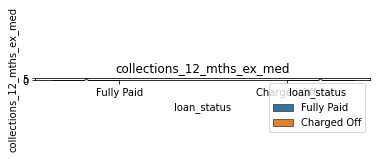

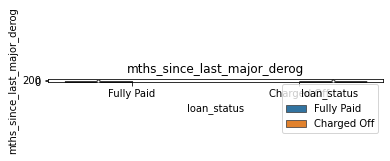

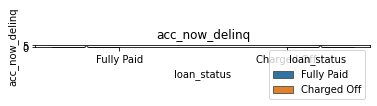

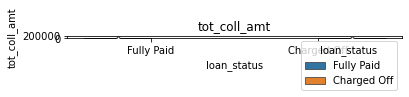

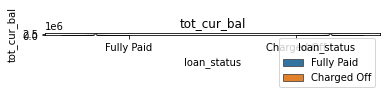

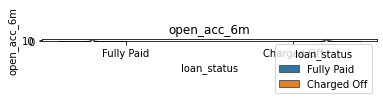

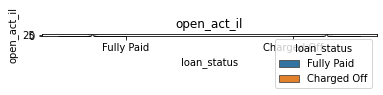

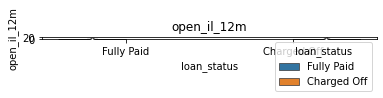

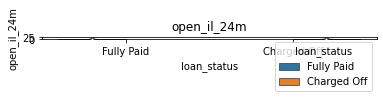

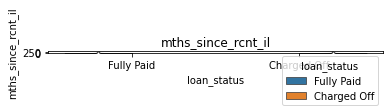

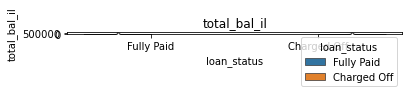

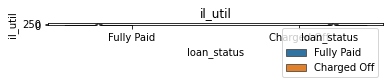

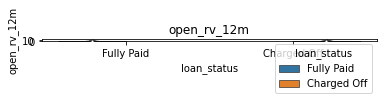

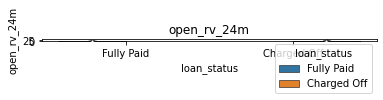

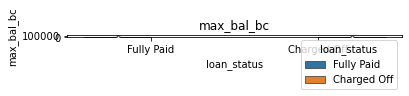

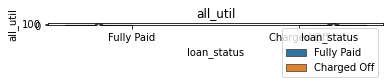

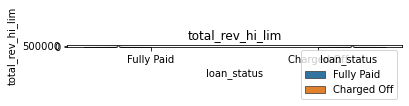

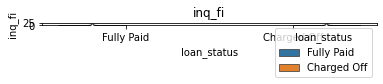

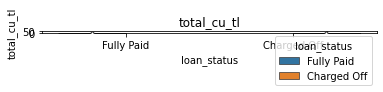

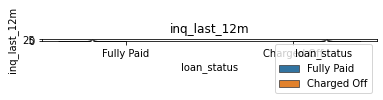

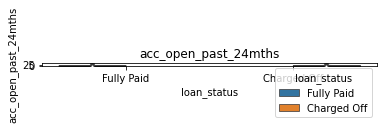

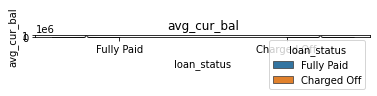

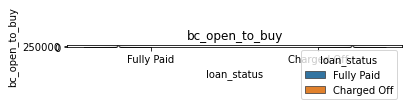

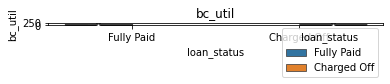

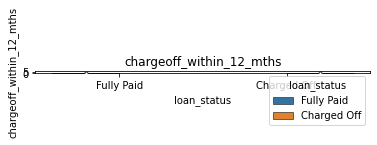

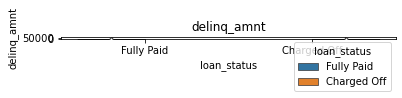

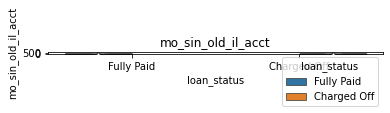

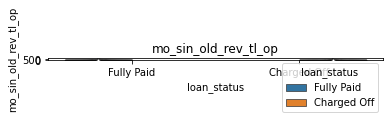

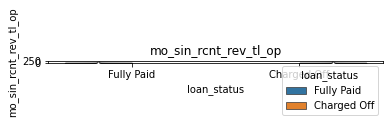

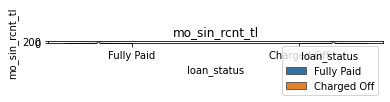

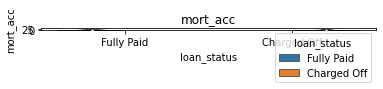

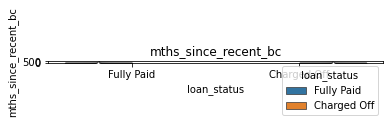

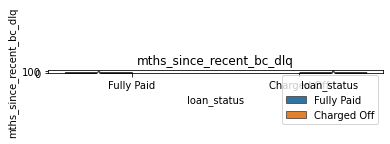

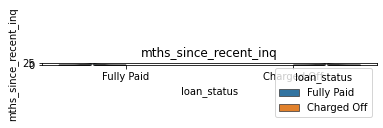

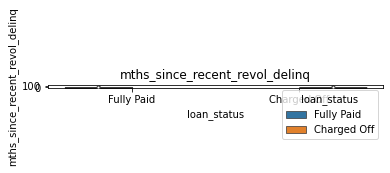

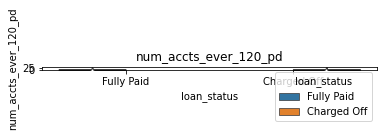

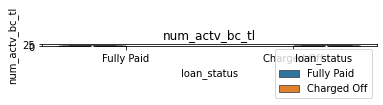

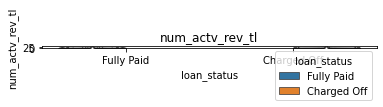

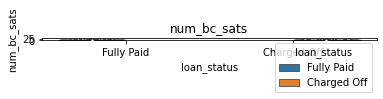

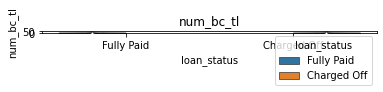

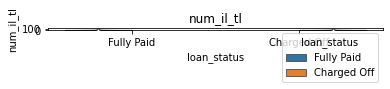

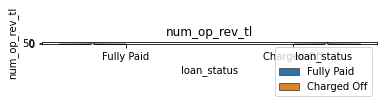

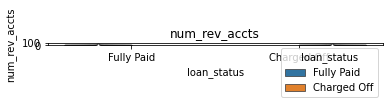

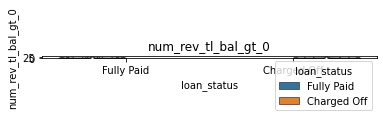

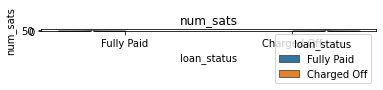

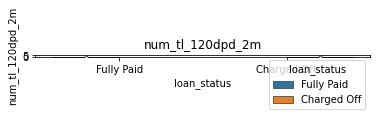

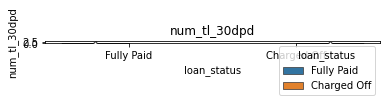

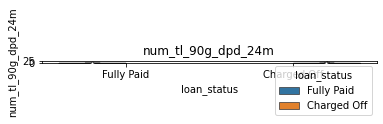

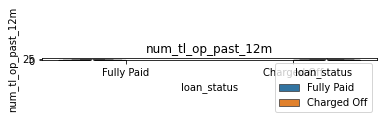

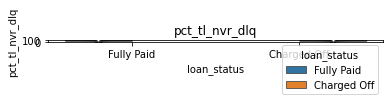

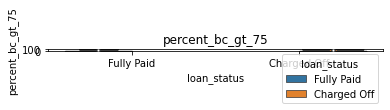

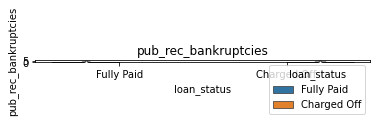

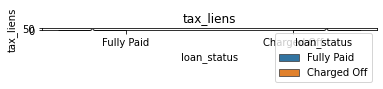

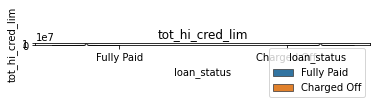

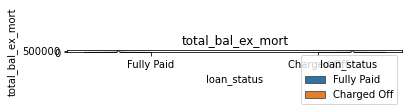

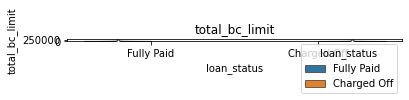

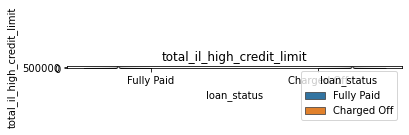

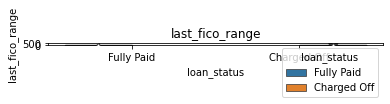

In [12]:
# loop through cols list to print swarmplots of each column

for i in numeric_cols:
#    sns.set(rc={'figure.figsize':(10,400)})
    num = (1 + numeric_cols.index(i))
    ax = plt.subplot(len(numeric_cols),1,num)
    sns.violinplot(x='loan_status', y=i, data=wrangled_data, hue='loan_status', orient='v')
    plt.title(i)
    plt.show()
    

In [13]:
# what can we conclude from the violin plots?


In [ ]:
# many outliers in the numeric data - need to investigate further


# Object datatype analysis:

In [ ]:
object_cols = list(wrangled_data.select_dtypes('object').columns)
object_cols

In [15]:
fully_paid_df = wrangled_data[wrangled_data['loan_status'] == 'Fully Paid']

charged_off_df = wrangled_data[wrangled_data['loan_status'] == 'Charged Off']

In [16]:
cols = ['grade',
 'sub_grade',
 'emp_length',
 'verification_status',
 'purpose',
 'initial_list_status',
 'application_type',
 'debt_settlement_flag',
  'term']

In [17]:
remaining_obj_features = list(np.setdiff1d(object_cols,cols))
remaining_obj_features

['addr_state',
 'earliest_cr_line',
 'emp_title',
 'home_ownership',
 'issue_d',
 'last_credit_pull_d',
 'loan_status',
 'zip_code']

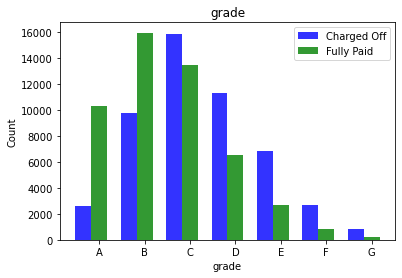

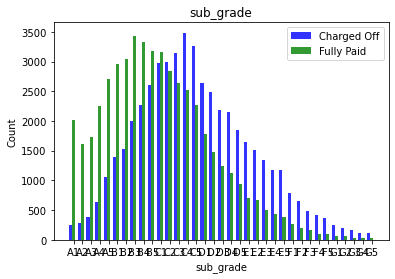

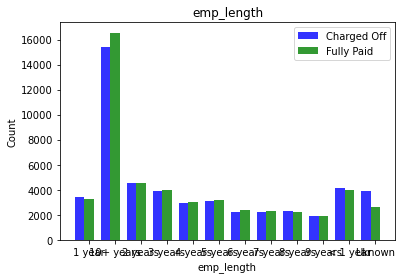

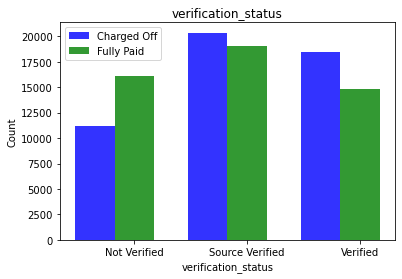

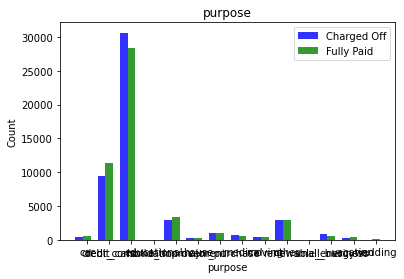

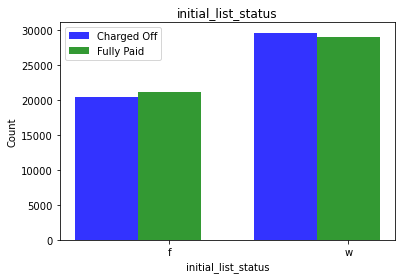

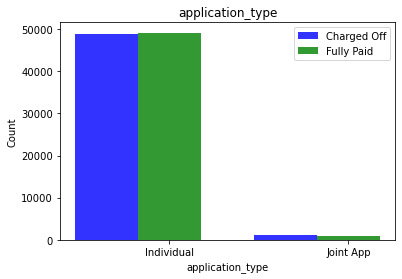

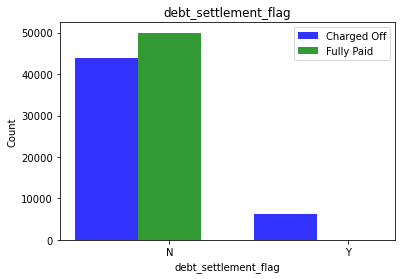

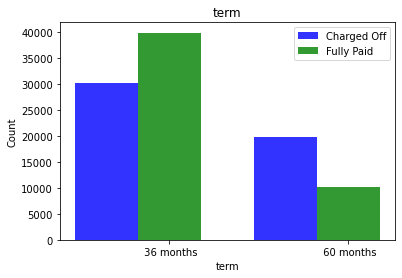

In [18]:
for i in cols:
    charged_off = pd.DataFrame(charged_off_df.groupby(by=i)['loan_status'].count().reset_index().values, columns=[i, 'Charged Off Count'])
    fully_paid = pd.DataFrame(fully_paid_df.groupby(by=i)['loan_status'].count().reset_index().values, columns=[i, 'Fully Paid Count'])
    
    # create x and y data
    x1 = charged_off[i]
    X = np.arange(len(x1))
    
    y1 = charged_off['Charged Off Count']
    y2 = fully_paid['Fully Paid Count']

    # data to plot
    n_groups = len(x1)

    # create plot
    fig, ax = plt.subplots()
    bar_width = 0.35
    opacity = 0.8

    ax1 = plt.bar(X,y1, bar_width,alpha=opacity,color='b',label='Charged Off')

    ax2 = plt.bar(X + bar_width, y2, bar_width,alpha=opacity,color='g',label='Fully Paid')
    
#    plt.figure(figsize=(1,1))
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.title(i)
    plt.xticks(X + bar_width, x1)
    plt.legend()
    plt.show()

In [19]:
remaining_obj_features

['addr_state',
 'earliest_cr_line',
 'emp_title',
 'home_ownership',
 'issue_d',
 'last_credit_pull_d',
 'loan_status',
 'zip_code']

In [22]:
# remove zip code - geographic trends will be covered by state

del wrangled_data['zip_code']

In [23]:
# loan maturity will take the place of earliest credit line and last credit pulled

wrangled_data['earliest_cr_line']

Loan ID
1592860    Feb-1996
1019497    Oct-2003
2072955    Sep-2003
1278099    Oct-2001
1870253    Sep-1983
             ...   
1799091    Aug-1990
1757121    Feb-2001
2009904    Oct-2001
11366      Jun-1989
236560     Jan-2005
Name: earliest_cr_line, Length: 99984, dtype: object

In [46]:
# convert to year
from datetime import datetime, timedelta

wrangled_data['earliest_cr_line'] = pd.to_datetime(wrangled_data['earliest_cr_line'])
wrangled_data['credit_maturity'] = datetime.now() - wrangled_data['earliest_cr_line']

In [ ]:
wrangled_data.shape

In [48]:
del wrangled_data['earliest_cr_line']

del wrangled_data['last_credit_pull_d']

In [50]:
wrangled_data.shape

(99984, 87)